## Matrix Multiplication Run Times

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
compiled_dir = f"..{os.sep}compiled"
plot_dir = f"..{os.sep}plots"

In [3]:
program_base_name = f"{compiled_dir}{os.sep}exercise_1"

In [4]:
opt_flags = ["O0", "O1", "O2", "O3", "Ofast"]
opt_flag_descriptors = [
    "Without optimization",
    "With O1 optimization",
    "With O2 optimization",
    "With O3 optimization",
    "With Ofast optimization"
]

In [5]:
mat_sizes = np.array([50, 100, 250, 500, 750, 1000, 2000])

In [6]:
def get_run_time(mat_mul_method, flag, mat_dim):
    """Get the run time for the given matrix multiplicatiion method, optimization flag, and matrix dimension."""
    run_params = [
        f"{program_base_name}_{flag}",
        "--mat_mul_method", mat_mul_method,
        "--num_rows", str(mat_dim),
        "--num_cols", str(mat_dim),
        "--num_inner_dim", str(mat_dim)
    ]

    output = subprocess.run(run_params, stdout=subprocess.PIPE, encoding='ascii')

    lines = output.stdout.split('\n')

    return float(lines[4].split('=')[1])

In [7]:
def write_csv(filename, matrix_dims, run_times):
    """Write list of run times as a function of matrix dimension to a file."""
    w = csv.writer(open(filename, "w"))
    w.writerow(["matrix_dim,run_time"])
    w.writerows(list(zip(matrix_dims, run_times)))

### Get Run Times

In [8]:
run_times = {
    "matmul": np.zeros((len(opt_flags), len(mat_sizes))),
    "row-col": np.zeros((len(opt_flags), len(mat_sizes))),
    "col-row": np.zeros((len(opt_flags), len(mat_sizes)))
}

In [9]:
for mat_mul_method in run_times.keys():
    output_base_filename = f"..{os.sep}data{os.sep}{mat_mul_method}_runtimes"

    print(f"Running {mat_mul_method} ...")

    for i, flag in enumerate(opt_flags):
        # iterate over matrix sizes
        for j, mat_dim in enumerate(mat_sizes):
            run_times[mat_mul_method][i, j] = get_run_time(mat_mul_method, flag, mat_dim)

        # write file
        write_csv(f"{output_base_filename}_{flag}.csv", mat_sizes, run_times[mat_mul_method][i])

Running matmul ...
Running row-col ...
Running col-row ...


In [10]:
run_times["matmul"]

array([[1.12000e-04, 1.38000e-04, 1.15900e-03, 1.12750e-02, 3.11240e-02,
        5.03250e-02, 3.99893e-01],
       [2.70000e-05, 8.40000e-05, 8.95000e-04, 6.41800e-03, 2.16470e-02,
        4.95790e-02, 3.95005e-01],
       [4.10000e-05, 7.90000e-05, 8.97000e-04, 6.23900e-03, 2.12830e-02,
        4.97490e-02, 3.98878e-01],
       [2.70000e-05, 7.90000e-05, 8.83000e-04, 6.25300e-03, 2.22530e-02,
        4.90280e-02, 4.02527e-01],
       [3.30000e-05, 7.80000e-05, 8.64000e-04, 6.26700e-03, 2.09170e-02,
        4.85490e-02, 3.93567e-01]])

In [11]:
run_times["row-col"]

array([[4.3100000e-04, 3.4590000e-03, 5.3547000e-02, 4.3090300e-01,
        1.4621540e+00, 3.4779210e+00, 2.8459586e+01],
       [4.3100000e-04, 3.4550000e-03, 5.3948000e-02, 4.3429600e-01,
        1.4784780e+00, 3.5579990e+00, 2.8353896e+01],
       [4.3600000e-04, 3.4560000e-03, 5.3717000e-02, 4.3038800e-01,
        1.4567500e+00, 3.4683040e+00, 2.8332397e+01],
       [4.3600000e-04, 3.4360000e-03, 5.3707000e-02, 4.3182200e-01,
        1.4575750e+00, 3.4738620e+00, 2.8255460e+01],
       [4.3800000e-04, 3.4450000e-03, 5.3358000e-02, 4.3018600e-01,
        1.4567570e+00, 3.4716030e+00, 2.8431540e+01]])

In [12]:
run_times["col-row"]

array([[2.9800000e-04, 2.3610000e-03, 3.8103000e-02, 3.0955000e-01,
        1.0332340e+00, 2.4726230e+00, 2.0173769e+01],
       [3.0000000e-04, 2.4120000e-03, 3.8978000e-02, 3.1137400e-01,
        1.0447440e+00, 2.5201820e+00, 2.0173389e+01],
       [2.9800000e-04, 2.3900000e-03, 3.8404000e-02, 3.0793300e-01,
        1.0587000e+00, 2.5323280e+00, 2.0070498e+01],
       [3.1500000e-04, 2.3900000e-03, 3.8558000e-02, 3.1058300e-01,
        1.0515020e+00, 2.5092410e+00, 1.9990208e+01],
       [3.0600000e-04, 2.3990000e-03, 3.8109000e-02, 3.0648000e-01,
        1.0291010e+00, 2.4543160e+00, 1.9881149e+01]])

### Perform Fit

In [13]:
fit_mat_sizes = np.linspace(mat_sizes[0], mat_sizes[-1], 100)

In [14]:
fit_params = {
    "matmul": np.zeros((len(opt_flags), 2)),
    "row-col": np.zeros((len(opt_flags), 2)),
    "col-row": np.zeros((len(opt_flags), 2))
}

In [15]:
fit_run_times = {
    "matmul": np.zeros((len(opt_flags), len(fit_mat_sizes))),
    "row-col": np.zeros((len(opt_flags), len(fit_mat_sizes))),
    "col-row": np.zeros((len(opt_flags), len(fit_mat_sizes)))
}

In [16]:
for mat_mul_method in run_times.keys():
    for i, flag in enumerate(opt_flags):
        p = np.polyfit(np.log(mat_sizes), np.log(run_times[mat_mul_method][i]), 1)
        fit_params[mat_mul_method][i] = p
        fit_run_times[mat_mul_method][i] = np.exp(p[0] * np.log(fit_mat_sizes) + p[1])

In [17]:
fit_params

{'matmul': array([[  2.3404894 , -19.06576253],
        [  2.64453988, -21.31056678],
        [  2.57105115, -20.82947481],
        [  2.65598493, -21.38760016],
        [  2.61061961, -21.10881738]]),
 'row-col': array([[  3.00613787, -19.51577036],
        [  3.008588  , -19.52392726],
        [  3.00259539, -19.49458684],
        [  3.00318447, -19.49852869],
        [  3.00301677, -19.49726899]]),
 'col-row': array([[  3.01608895, -19.92522867],
        [  3.01399251, -19.90044219],
        [  3.01722863, -19.92369263],
        [  3.00454219, -19.84182823],
        [  3.00522773, -19.86007771]])}

### Plot Results

In [18]:
plot_names = [f"{plot_dir}{os.sep}matmul_run_times_{opt}.pdf" for opt in opt_flags]

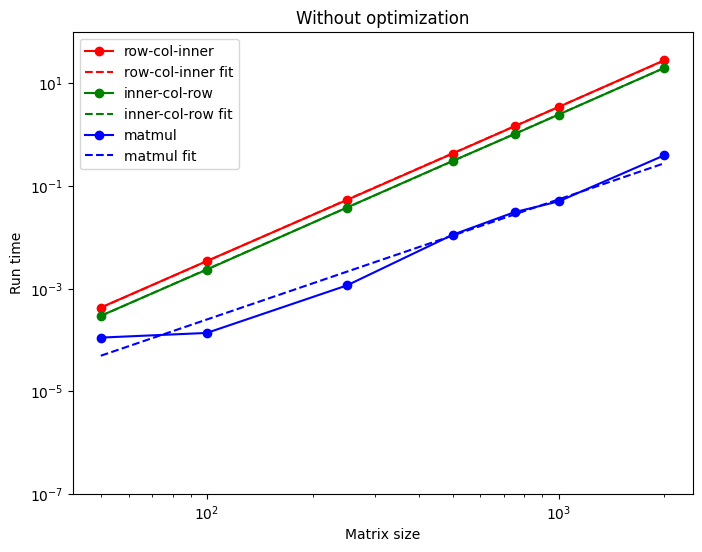

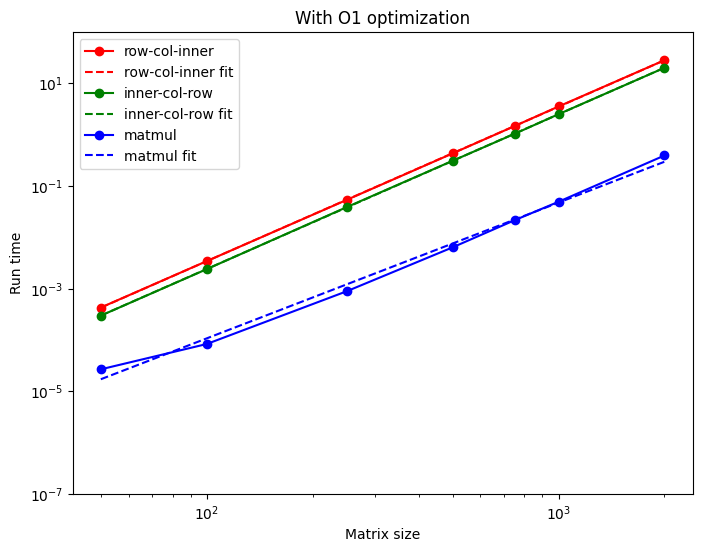

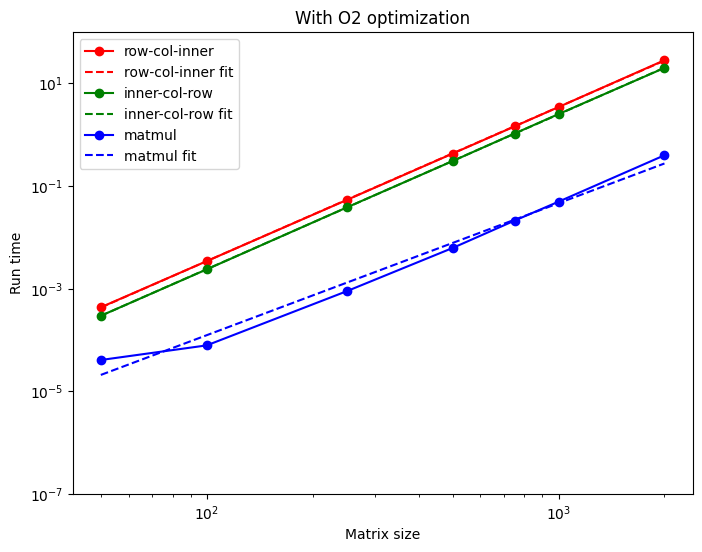

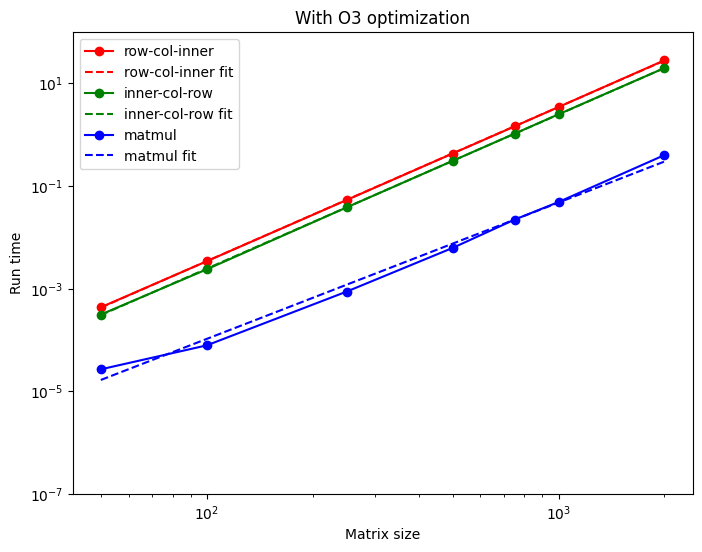

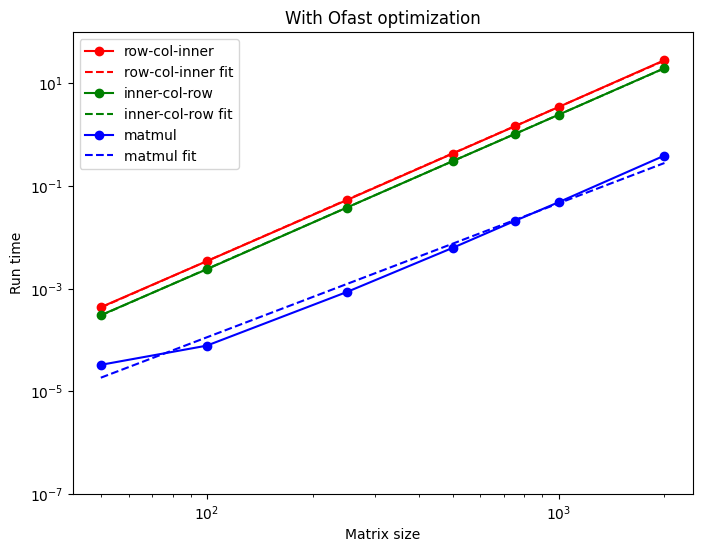

In [19]:
for i in range(len(opt_flags)):
    plt.figure(figsize=(8, 6))
    plt.loglog(mat_sizes, run_times["row-col"][i], 'o-', c='r', label='row-col-inner')
    plt.loglog(fit_mat_sizes, fit_run_times["row-col"][i],'--',  c='r', label='row-col-inner fit')
    
    plt.loglog(mat_sizes, run_times["col-row"][i], 'o-', c='g', label='inner-col-row')
    plt.loglog(fit_mat_sizes, fit_run_times["col-row"][i], '--', c='g', label='inner-col-row fit')
    
    plt.loglog(mat_sizes, run_times["matmul"][i], 'o-', c='b', label='matmul')
    plt.loglog(fit_mat_sizes, fit_run_times["matmul"][i], '--', c='b', label='matmul fit')
    
    plt.title(opt_flag_descriptors[i])
    plt.xlabel('Matrix size')
    plt.ylabel('Run time')
    plt.ylim([1e-7, 1e2])
    plt.legend(loc='upper left')
    plt.savefig(plot_names[i], format="pdf", bbox_inches="tight");